# Programming Component (Logistic Regression)

In [1]:
"""
CSCC11 - Introduction to Machine Learning, Fall 2021, Assignment 2
M. Ataei
"""

import matplotlib.pyplot as plt
import numpy as np

from utils import load_pickle_dataset

In [2]:
def visualize_2d_data(X, y):
    """ This function generates a 2D scatter plot given the inputs and their corresponding labels.
    Inputs with different classes are represented with different colours.

    Args:
    - X (ndarray (shape: (N, D))): A NxD matrix consisting N D-dimensional inputs.
    - y (ndarray (shape: (N, 1))): A N-column vector consisting N scalar outputs (labels).
    """
    assert len(X.shape) == len(y.shape) == 2, f"Input/output pairs must be 2D-arrays. X: {X.shape}, y: {y.shape}"
    (N, D) = X.shape
    assert N == y.shape[0], f"Number of samples must match for input/output pairs. X: {N}, y: {y.shape[0]}"
    assert D == 2, f"Expected 2 features. Got: {D}"
    assert y.shape[1] == 1, f"Y must be a column vector. Got: {y.shape}"

    # ====================================================
    # TODO: Implement your solution within the box
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.xlabel("x1")
    plt.ylabel("x2")
    # ====================================================

In [3]:
def visualize_data(setName: str):
    # Support generic_1, generic_2, generic_3
    dataset = setName

    assert dataset in ("generic_1", "generic_2", "generic_3", "wine"), f"Invalid dataset: {dataset}"

    dataset_path = f"./datasets/{dataset}.pkl"
    data = load_pickle_dataset(dataset_path)
    visualize_2d_data(data['train_X'], data['train_y'])

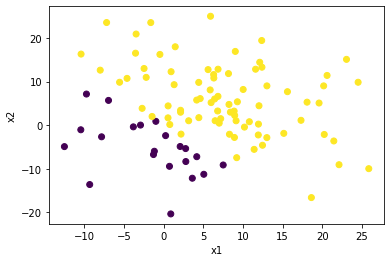

In [4]:
# Plot dataset "generic_1"
visualize_data("generic_1")

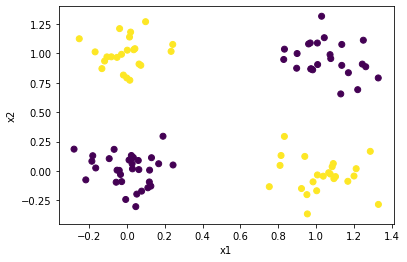

In [5]:
# Plot dataset "generic_2"
visualize_data("generic_2")

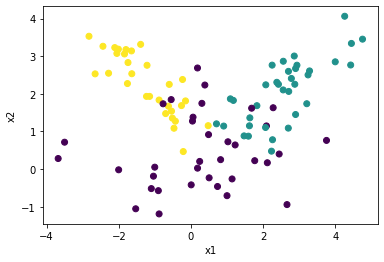

In [6]:
# Plot dataset "generic_3"
visualize_data("generic_3")

## A2 Pg.5 Questions 1-4
1). Yes, I would expect logistic regression to perform well on generic_1.  
By observing the plot of the training data above for generic_1, we can clearly see that the 2 classes of inputs are linearly seperable. From the first written question of this assignment, we know that logistic regression has a linear decision boundary so it is quite clear that logistic regression would perform well on generic_1 which is linearly seperable. All that has to be done is to set a decision boundary that seperates the 2 classes of inputs.  
For generic_1, applying the feature map wouldn't really help much since regular logistic regression would already perform very well. However, it wouldn't perform worse since if you set $w_{3}$ to $0$, it would be the same as regular logistic regression.  

2). No, I would not expect logistic regression to perform well on generic_2.  
By observing the plot of the training data above for generic_2, we can see that the 2 classes of inputs are clearly not linearly seperable. Knowing that logistic regression has a linear decision boundary, it is clear that logistic regression would not perform well for generic_2 since there would be no linear decision boundary one could setup to classify the inputs with high accuracy. This is to be expected as generic_2 closely resembles the XOR dataset which we looked at in the written questions.  
For generic_2, applying the feature map defined in Eqn. 1.2 would help the performance in this case. As mentioned, generic_2 closely resembles the XOR dataset we looked at in the written questions so for the same reason, applying the feature map would improve the performance substantially.  

3). No, I would not expect logistic regression to perform well on generic_3.  
By observing the plot of the training data above for generic_3, there is a lot of overlap between the 3 classes of inputs especially near the center of the plot. It would be difficult for a decision boundary to classify the 3 classes of inputs with good performance given the amount of overlap.  

4). We cannot directly visualize the wine dataset because the input is 13-Dimensional and we cannot plot 13 dimensions directly onto a 2D scatter plot. In order to visualize higher dimensional data such as the wine dataset, one could use things such as colour schemes based on hue, saturation, value, lightness, etc in order to visualize the missing spatial dimension.  


In [7]:
#logistic_regression.py
import numpy as np
from utils import softmax

class LogisticRegression:
    def __init__(self,
                 num_features,
                 num_classes,
                 rng=np.random):
        """ This class represents a multinomial logistic regression model.
        NOTE: We assume lables are 0 to K - 1, where K is number of classes.

        self.parameters contains the model weights.
        NOTE: Bias term is the first term

        TODO: You will need to implement the methods of this class:
        - _compute_loss_and_gradient: ndarray, ndarray -> float, ndarray

        Implementation description will be provided under each method.

        For the following:
        - N: Number of samples.
        - D: Dimension of input features.
        - K: Number of classes.

        Args:
        - num_features (int): The number of features in the input data.
        - num_classes (int): The number of classes in the task.
        - rng (RandomState): The random number generator to initialize weights.
        """
        self.num_features = num_features
        self.num_classes = num_classes
        self.rng = rng

        # Initialize parameters
        self.parameters = np.zeros(shape=(num_classes, self.num_features + 1))

    def init_weights(self, factor=1, bias=0):
        """ This randomly initialize the model weights.

        Args:
        - factor (float): A constant factor of the randomly initialized weights.
        - bias (float): The bias value
        """
        self.parameters[:, 1:] = factor * \
            self.rng.rand(self.num_classes, self.num_features)
        self.parameters[:, 0] = bias

    def _compute_loss_and_gradient(self, X, y, alpha_inverse=0, beta_inverse=0):
        """ This computes the negative log likelihood (NLL) or negative log posterior and its gradient.

        NOTE: When we have alpha_inverse != 0 or beta_inverse != 0, we have negative log posterior (NLP) instead.
        NOTE: For the L2 term, drop all the log constant terms and cosntant factor.
              For the NLL term, divide by the number of data points (i.e. we are taking the mean).
              The new loss should take the form:
                  E_new(w) = (NLL_term / N) + L2_term
        NOTE: Compute the gradient based on the modified loss E_new(w)

        Args:
        - X (ndarray (shape: (N, D))): A NxD matrix consisting N D-dimensional inputs.
        - y (ndarray (shape: (N, 1))): A N-column vector consisting N scalar outputs (labels).
        - alpha_inverse (float): 1 / variance for an optional isotropic Gaussian  prior (for the weights) on NLP.
                                NOTE: 0 <= alpha_inverse. Setting alpha_inverse to 0 means no prior on weights.
        - beta_inverse (float): 1 / variance for an optional Gaussian prior (for the bias term) on NLP.
                                NOTE: 0 <= beta_inverse. Setting beta_inverse to 0 means no prior on the bias term.

        Output:
        - nll (float): The NLL (or NLP) of the given inputs and outputs.
        - grad (ndarray (shape: (K, D + 1))): A Kx(D + 1) weight matrix (including bias) consisting the gradient of NLL (or NLP)
                                              (i.e. partial derivatives of NLL (or NLP) w.r.t. self.parameters).
        """
        (N, D) = X.shape
        # ====================================================
        # TODO: Implement your solution within the box

        probabilities = self.predict(X)
        grad = np.zeros(shape=(self.num_classes, D+1))

        # compute NLL
        nll = 0
        for i in range(N):
            nll -= np.log(probabilities[i, y[i]])
        nll = nll / N

        # compute gradient of NLL WRT w_k
        for k in range(self.num_classes):
            for i in range(N):
                if y[i] == k:
                    grad[k] -= (np.hstack((np.array([1], dtype=np.float),
                                           X[i])) * (1 - probabilities[i, k]))
                else:
                    grad[k] += (np.hstack((np.array([1], dtype=np.float), X[i]))
                                * probabilities[i, k])
            grad[k] = grad[k] / N

        # compute L2 term and gradient of L2 term for NLP
        if not alpha_inverse == 0 and not beta_inverse == 0:
            covInvDiag = np.hstack(
                (np.array([beta_inverse]), np.full(D, alpha_inverse)))
            covInv = np.diag(covInvDiag)
            l2 = np.trace(self.parameters @ covInv @ self.parameters.T)
            nll = nll + l2

            for k in range(self.num_classes):
                grad[k] += np.reshape((covInv @ np.reshape(self.parameters[k],
                                                           newshape=(D+1, 1))), newshape=D+1)

        # ====================================================

        return nll, grad

    def learn(self,
              train_X,
              train_y,
              num_epochs=1000,
              step_size=1e-3,
              check_grad=False,
              verbose=False,
              alpha_inverse=0,
              beta_inverse=0,
              eps=np.finfo(np.float).eps):
        """ This performs gradient descent to learn the parameters given the training data.

        NOTE: This method mutates self.parameters

        Args:
        - train_X (ndarray (shape: (N, D))): A NxD matrix consisting N D-dimensional training inputs.
        - train_y (ndarray (shape: (N, 1))): A N-column vector consisting N scalar training outputs (labels).
        - num_epochs (int): Number of gradient descent steps
                        NOTE: 1 <= num_epochs
        - step_size (float): Gradient descent step size
        - check_grad (bool): Whether or not to check gradient using finite difference.
        - verbose (bool): Whether or not to print gradient information for every step.
        - alpha_inverse (float): 1 / variance for an optional isotropic Gaussian  prior (for the weights) on NLL.
                                NOTE: 0 <= alpha_inverse. Setting alpha_inverse to 0 means no prior on weights.
        - beta_inverse (float): 1 / variance for an optional Gaussian prior (for the bias term) on NLL.
                                NOTE: 0 <= beta_inverse. Setting beta_inverse to 0 means no prior on the bias term.
        - eps (float): Machine epsilon

        ASIDE: The design for applying gradient descent to find local minimum is usually different from this.
               You should think about a better way to do this! Scipy is a good reference for such design.
        """
        assert len(train_X.shape) == len(
            train_y.shape) == 2, f"Input/output pairs must be 2D-arrays. train_X: {train_X.shape}, train_y: {train_y.shape}"
        (N, D) = train_X.shape
        assert N == train_y.shape[
            0], f"Number of samples must match for input/output pairs. train_X: {N}, train_y: {train_y.shape[0]}"
        assert D == self.num_features, f"Expected {self.num_features} features. Got: {D}"
        assert train_y.shape[1] == 1, f"train_Y must be a column vector. Got: {train_y.shape}"
        assert 1 <= num_epochs, f"Must take at least 1 gradient step. Got: {num_epochs}"

        nll, grad = self._compute_loss_and_gradient(
            train_X, train_y, alpha_inverse, beta_inverse)

        # Check gradient using finite difference
        if check_grad:
            original_parameters = np.copy(self.parameters)
            grad_approx = np.zeros(
                shape=(self.num_classes, self.num_features + 1))
            h = 1e-8

            # Compute finite difference w.r.t. each weight vector component
            for ii in range(self.num_classes):
                for jj in range(self.num_features + 1):
                    self.parameters = np.copy(original_parameters)
                    self.parameters[ii][jj] += h
                    grad_approx[ii][jj] = (self._compute_loss_and_gradient(
                        train_X, train_y, alpha_inverse, beta_inverse)[0] - nll) / h

            # Reset parameters back to original
            self.parameters = np.copy(original_parameters)

            print(f"Negative Log Probability: {nll}")
            print(f"Analytic Gradient: {grad.T}")
            print(f"Numerical Gradient: {grad_approx.T}")
            print("The gradients should be nearly identical.")

        # Perform gradient descent
        for epoch_i in range(num_epochs):
            original_parameters = np.copy(self.parameters)
            # Check gradient flow
            if np.linalg.norm(grad) < eps:
                print(
                    f"Gradient is close to 0: {eps}. Terminating gradient descent.")
                break

            # Determine the suitable step size.
            step_size *= 2
            self.parameters = original_parameters - step_size * grad
            E_new, grad_new = self._compute_loss_and_gradient(
                train_X, train_y, alpha_inverse, beta_inverse)
            assert np.isfinite(E_new), f"Error is NaN/Inf"

            while E_new >= nll and step_size > 0:
                step_size /= 2
                self.parameters = original_parameters - step_size * grad
                E_new, grad_new = self._compute_loss_and_gradient(
                    train_X, train_y, alpha_inverse, beta_inverse)
                assert np.isfinite(E_new), f"Error is NaN/Inf"

            if step_size <= eps:
                print(
                    f"Infinitesimal step: {step_size}. Terminating gradient descent.")
                break

            if verbose:
                print(
                    f"Epoch: {epoch_i}, Step size: {step_size}, Gradient Norm: {np.linalg.norm(grad)}, NLL: {nll}")

            # Update next loss and next gradient
            grad = grad_new
            nll = E_new

    def predict(self, X):
        """ This computes the probability of labels given X.

        Args:
        - X (ndarray (shape: (N, D))): A NxD matrix consisting N D-dimensional inputs.

        Output:
        - probs (ndarray (shape: (N, K))): A NxK matrix consisting N K-probabilities for each input.
        """
        (N, D) = X.shape
        assert D == self.num_features, f"Expected {self.num_features} features. Got: {D}"

        # Pad 1's for bias term
        X = np.hstack((np.ones(shape=(N, 1), dtype=np.float), X))

        # This receives the probabilities of class 1 given inputs
        probs = softmax(X @ self.parameters.T)
        return probs


/var/folders/8c/68t2b5h95mz8yfd_fsjssk500000gn/T/ipykernel_30287/2135125795.py:121: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps):


In [8]:
#train_logistic_regression.py
import numpy as np
from numpy.core.shape_base import hstack
from logistic_regression import LogisticRegression
from utils import load_pickle_dataset

def train(train_X,
          train_y,
          test_X=None,
          test_y=None,
          data_preprocessing=lambda X: X,
          factor=1,
          bias=0,
          alpha_inverse=0,
          beta_inverse=0,
          num_epochs=1000,
          step_size=1e-3,
          check_grad=False,
          verbose=False):
    """ This function trains a logistic regression model given the data.

    Args:
    - train_X (ndarray (shape: (N, D))): A NxD matrix consisting N D-dimensional training inputs.
    - train_y (ndarray (shape: (N, 1))): A N-column vector consisting N scalar training outputs (labels).
    - test_X (ndarray (shape: (M, D))): A NxD matrix consisting M D-dimensional test inputs.
    - test_y (ndarray (shape: (M, 1))): A N-column vector consisting M scalar test outputs (labels).
    - data_preprocessing (ndarray -> ndarray): A data-preprocessing function that is applied on both the
                                               training and test inputs.

    Initialization Args:
    - factor (float): A constant factor of the randomly initialized weights.
    - bias (float): The bias value

    Learning Args:
    - num_epochs (int): Number of gradient descent steps
                        NOTE: 1 <= num_epochs
    - step_size (float): Gradient descent step size
    - check_grad (bool): Whether or not to check gradient using finite difference.
    - verbose (bool): Whether or not to print gradient information for every step.
    """
    train_accuracy = 0
    # ====================================================
    # TODO: Implement your solution within the box
    # Step 0: Apply data-preprocessing (i.e. feature map) on the input data
    train_X = data_preprocessing(train_X)
    # Step 1: Initialize model and initialize weights
    model = LogisticRegression(train_X.shape[1], np.amax(train_y) + 1)
    model.init_weights(factor, bias)

    # Step 2: Train the model
    model.learn(train_X, train_y, num_epochs, step_size,
                check_grad, verbose, alpha_inverse, beta_inverse)

    # Step 3: Evaluate training performance
    train_probs = model.predict(train_X)

    # ====================================================
    train_preds = np.argmax(train_probs, axis=1)
    train_accuracy = 100 * np.mean(train_preds == train_y.flatten())
    print("Training Accuracy: {}%".format(train_accuracy))

    if test_X is not None and test_y is not None:
        test_accuracy = 0
        # ====================================================
        # TODO: Implement your solution within the box
        # Evaluate test performance
        test_X = data_preprocessing(test_X)
        test_probs = model.predict(test_X)

        # ====================================================
        test_preds = np.argmax(test_probs, axis=1)
        test_accuracy = 100 * np.mean(test_preds == test_y.flatten())
        print("Test Accuracy: {}%".format(test_accuracy))


def feature_map(X):
    """ This function perform applies a feature map on the given input.

        Given any 2D input vector x, the output of the feature map psi is a 3D vector, defined as:
        psi(x) = (x_1, x_2, x_1 * x_2)^T

        Args:
        - X (ndarray (shape: (N, 2))): A Nx2 matrix consisting N 2-dimensional inputs.

        Output:
        - X_mapped (ndarray (shape: (N, 3))): A Nx3 matrix consisting N 3-dimensional vectors corresponding 
                                              to the outputs of the feature map applied on the inputs X.
    """
    assert X.shape[1] == 2, f"This feature map only applies to 2D inputs. Got: {X.shape[1]}"
    # ====================================================
    # TODO: Implement your non-linear-map here

    X_mapped = np.zeros(shape=(X.shape[0], 3), dtype=np.float)

    for i in range(X.shape[0]):
        X_mapped[i] = hstack((X[i], np.array([X[i, 0] * X[i, 1]])))

    # ====================================================

    return X_mapped

def run_logistic_regression(dataset: str, alpha_inverse: float, beta_inverse: float, apply_data_preprocessing: bool):
    seed = 0
    np.random.seed(seed)

    # Support generic_1, generic_2, generic_3, wine
    dataset = dataset

    assert dataset in ("generic_1", "generic_2", "generic_3",
                       "wine"), f"Invalid dataset: {dataset}"

    dataset_path = f"./datasets/{dataset}.pkl"
    data = load_pickle_dataset(dataset_path)

    train_X = data['train_X']
    train_y = data['train_y']
    test_X = test_y = None
    test_X = test_y = None

    if 'test_X' in data and 'test_y' in data:
        test_X = data['test_X']
        test_y = data['test_y']

    # ====================================================
    # Hyperparameters
    # NOTE: This is definitely not the best way to pass all your hyperparameters.
    #       We can usually use a configuration file to specify these.
    # ====================================================
    factor = 1
    bias = 0
    alpha_inverse = alpha_inverse
    beta_inverse = beta_inverse
    num_epochs = 1000
    step_size = 1e-3
    apply_data_preprocessing = apply_data_preprocessing
    check_grad = True
    verbose = False

    def data_preprocessing(X): return X
    if apply_data_preprocessing:
        data_preprocessing = feature_map

    train(train_X=train_X,
          train_y=train_y,
          test_X=test_X,
          test_y=test_y,
          data_preprocessing=data_preprocessing,
          factor=factor,
          bias=bias,
          alpha_inverse=alpha_inverse,
          beta_inverse=beta_inverse,
          num_epochs=num_epochs,
          step_size=step_size,
          check_grad=check_grad,
          verbose=verbose)

In [9]:
run_logistic_regression('generic_1', alpha_inverse=0, beta_inverse=0, apply_data_preprocessing=False)

Negative Log Probability: [1.30299103]
Analytic Gradient: [[ 0.34251777 -0.34251777]
 [ 2.76298785 -2.76298785]
 [ 5.5288903  -5.5288903 ]]
Numerical Gradient: [[ 0.34251777 -0.3425177 ]
 [ 2.76298799 -2.76298782]
 [ 5.52889039 -5.52889023]]
The gradients should be nearly identical.
Training Accuracy: 100.0%
Test Accuracy: 100.0%


In [10]:
run_logistic_regression('generic_1', alpha_inverse=1/10, beta_inverse=1/100, apply_data_preprocessing=False)

Negative Log Probability: [1.45028238]
Analytic Gradient: [[ 0.34251777 -0.34251777]
 [ 2.8178692  -2.70271152]
 [ 5.60040924 -5.47440199]]
Numerical Gradient: [[ 0.34251777 -0.3425177 ]
 [ 2.87275068 -2.64243516]
 [ 5.67192826 -5.41991361]]
The gradients should be nearly identical.
Infinitesimal step: 0.0. Terminating gradient descent.
Training Accuracy: 99.0%
Test Accuracy: 100.0%


In [11]:
run_logistic_regression('generic_2', alpha_inverse=0, beta_inverse=0, apply_data_preprocessing=False)

Negative Log Probability: [0.69340167]
Analytic Gradient: [[-0.03786126  0.03786126]
 [-0.00789853  0.00789853]
 [ 0.00673738 -0.00673738]]
Numerical Gradient: [[-0.0378612   0.03786133]
 [-0.00789847  0.00789858]
 [ 0.00673739 -0.00673736]]
The gradients should be nearly identical.
Infinitesimal step: 0.0. Terminating gradient descent.
Training Accuracy: 41.0%
Test Accuracy: 28.000000000000004%


In [12]:
run_logistic_regression('generic_2', alpha_inverse=0, beta_inverse=0, apply_data_preprocessing=True)

Negative Log Probability: [0.69992675]
Analytic Gradient: [[-0.01998411  0.01998411]
 [ 0.00396067 -0.00396067]
 [ 0.02117265 -0.02117265]
 [-0.11066245  0.11066245]]
Numerical Gradient: [[-0.01998414  0.01998408]
 [ 0.00396069 -0.00396065]
 [ 0.02117263 -0.02117267]
 [-0.11066246  0.11066248]]
The gradients should be nearly identical.


/var/folders/8c/68t2b5h95mz8yfd_fsjssk500000gn/T/ipykernel_30287/1751132935.py:93: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_mapped = np.zeros(shape=(X.shape[0], 3), dtype=np.float)


Training Accuracy: 100.0%
Test Accuracy: 100.0%


In [13]:
run_logistic_regression('generic_3', alpha_inverse=0, beta_inverse=0, apply_data_preprocessing=False)

Negative Log Probability: [1.05273039]
Analytic Gradient: [[ 0.028495   -0.0467047   0.0182097 ]
 [ 0.17864116 -0.62783493  0.44919377]
 [ 0.47239894 -0.28605545 -0.18634349]]
Numerical Gradient: [[ 0.02849494 -0.04670473  0.01820961]
 [ 0.1786411  -0.62783501  0.44919368]
 [ 0.4723989  -0.28605549 -0.1863435 ]]
The gradients should be nearly identical.
Infinitesimal step: 0.0. Terminating gradient descent.
Training Accuracy: 79.0%
Test Accuracy: 82.0%


In [14]:
run_logistic_regression('generic_3', alpha_inverse=0, beta_inverse=0, apply_data_preprocessing=True)

Negative Log Probability: [1.83615293]
Analytic Gradient: [[-0.03962738 -0.14654356  0.18617094]
 [-0.19974318 -0.88297108  1.08271426]
 [ 0.33105306 -0.51007556  0.1790225 ]
 [-0.57079599 -2.16482874  2.73562473]]
Numerical Gradient: [[-0.0396273  -0.1465436   0.18617101]
 [-0.19974316 -0.88297099  1.08271436]
 [ 0.33105303 -0.51007558  0.17902255]
 [-0.57079588 -2.16482867  2.73562486]]
The gradients should be nearly identical.


/var/folders/8c/68t2b5h95mz8yfd_fsjssk500000gn/T/ipykernel_30287/1751132935.py:93: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_mapped = np.zeros(shape=(X.shape[0], 3), dtype=np.float)


Infinitesimal step: 0.0. Terminating gradient descent.
Training Accuracy: 83.0%
Test Accuracy: 82.0%


In [15]:
run_logistic_regression('wine', alpha_inverse=0, beta_inverse=0, apply_data_preprocessing=False)

Negative Log Probability: [1.42718073]
Analytic Gradient: [[-0.02933657 -0.03979514  0.06913171]
 [-0.37200333  0.49518327 -0.12317995]
 [ 0.15445398 -0.03221763 -0.12223635]
 [-0.069178    0.12639394 -0.05721594]
 [ 0.38829711 -0.31444952 -0.07384759]
 [-0.19975295  0.27254254 -0.07278959]
 [-0.29137352  0.15710511  0.13426841]
 [-0.31741586  0.1148926   0.20252327]
 [ 0.2439647  -0.10688404 -0.13708065]
 [-0.14094616  0.1021717   0.03877446]
 [-0.09859216  0.37941347 -0.28082131]
 [-0.18655267 -0.03492793  0.2214806 ]
 [-0.23295505 -0.04124034  0.27419539]
 [-0.49068098  0.46635439  0.02432659]]
Numerical Gradient: [[-0.02933669 -0.03979523  0.06913161]
 [-0.37200347  0.49518314 -0.12318007]
 [ 0.15445387 -0.03221767 -0.12223655]
 [-0.06917809  0.1263939  -0.05721601]
 [ 0.38829697 -0.3144496  -0.07384766]
 [-0.19975304  0.27254243 -0.07278969]
 [-0.29137368  0.157105    0.13426831]
 [-0.31741594  0.1148925   0.20252318]
 [ 0.24396454 -0.10688415 -0.13708072]
 [-0.14094623  0.1021716

In [16]:
run_logistic_regression('wine', alpha_inverse=1/10, beta_inverse=1/100, apply_data_preprocessing=False)

Negative Log Probability: [2.99861301]
Analytic Gradient: [[-0.02933657 -0.03979514  0.06913171]
 [-0.31712197  0.58774294 -0.10884462]
 [ 0.22597291 -0.02511402 -0.02776946]
 [-0.00890166  0.13510687 -0.00503111]
 [ 0.44278543 -0.31242768 -0.0323814 ]
 [-0.15738747  0.35580453 -0.04633403]
 [-0.22678411  0.23492079  0.21169177]
 [-0.27365714  0.20189381  0.2481383 ]
 [ 0.333142   -0.00902221 -0.08023726]
 [-0.04457989  0.18208756  0.04065344]
 [-0.06024801  0.4255614  -0.21905776]
 [-0.10738016  0.04312499  0.28269017]
 [-0.18006556 -0.0294129   0.33588879]
 [-0.43387652  0.53034649  0.1187014 ]]
Numerical Gradient: [[-0.02933671 -0.03979523  0.06913163]
 [-0.26224076  0.68030248 -0.09450938]
 [ 0.29749172 -0.01801048  0.06669723]
 [ 0.05137455  0.14381976  0.04715366]
 [ 0.4972736  -0.31040592  0.00908473]
 [-0.11502208  0.43906638 -0.01987859]
 [-0.16219488  0.31273633  0.28911504]
 [-0.2298985   0.28889495  0.29375324]
 [ 0.42231916  0.08883951 -0.02339391]
 [ 0.05178631  0.2620033

## A2 Pg.6 Questions 1-4 (Logistic Regression Model)


1). After running logistic regression without regularization or feature map on the **generic_1** dataset, I did not notice any significant numerical errors as the gradients are nearly identical.   
**Without Regularization:**  
Training Accuracy: 100%  
Test Accuracy: 100%  

After running with regularization, I do notice that the analytical and numerical gradients have a slightly larger difference compared to the previous run without regularization. Also, the training accuracy has gone down to 99% from 100%.  
**With Regularization:**  
Training Accuracy: 99%  
Test Accuracy: 100%  

2). As expected, logistic regression without the feature map performs poorly on the **generic_2** dataset.  
**Without Feature_map:**  
Training Accuracy: 41%  
Test Accuracy: 28%  

After apply the feature map, the performance improves significantly as both the training and the test accuracy increases to 100%. As we previously saw when visualizing the generic_2 dataset, the dataset is very similar to the XOR dataset and from the written questions, we know that after applying the feature map on the XOR dataset, logistic regression can classify it perfectly. Thus, the same behaviour happening to the generic_2 dataset is extremely reasonable.  
In 2 dimensions, there is no linear classifier for this nature of data that can classify with reasonably good accuracy but applying the feature map transforms the dataset into 3 dimensions, and with this transformation there is actually a hyperplane in this 3-D space that can perfectly classify the transformed inputs. Intuitively, looking at the scatter plot of the generic_2 dataset, the set of points on the top right near (1,1) will be raised to a height of 1 in the 3-dimensional space while the other set of points stay at a height of 0. One can then visualize a hyperplane seperating the points near (1,1,1) and (0,0,0) from the set of points at (1,0,0) and (0,1,0). Thus logistic regression can apply this decision boundary to perfectly classify the data.  

3). Logistic regression performance on **generic_3** dataset:  
**Without Feature Map:**  
Training Accuracy: 79%  
Test Accuracy: 82%  

**With Feature Map:**    
Training Accuracy: 83%  
Test Accuracy: 82%  

As we can see, the performance does not really change after applying the feature map.  

4). Logistic regression does perform very well on the wine dataset.  
**Without Regularization:**  
Training Accuracy: 100.0%  
Test Accuracy: 96.66666666666667%  

**With Regularization:**  
Training Accuracy: 99.32432432432432%  
Test Accuracy: 100.0%  